<a href="https://colab.research.google.com/github/electrojam/Curso-de-Clustering-con-Python-y-scikit-learn/blob/main/proyecto_countries_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto de clustering

### Importar librerías

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df_country = pd.read_csv('Country-data.csv')
df_country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [67]:
df_country.shape

(167, 10)

In [68]:
df_country.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [69]:
df_country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### Manejando valores nulos

In [70]:
# Revisamos si hay valores nulos en el df
df_country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### Validando duplicados

In [71]:
# Revisamos si df tiene filas completas con valores duplicados
df_country[df_country.duplicated()]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


### Análisis de distribución

In [72]:
# Revisamos si hay outliers estadísticos mediante distribución de datos
int_cols = df_country.select_dtypes(exclude='object').columns #obtenemos solo nombre de variables numéricas
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

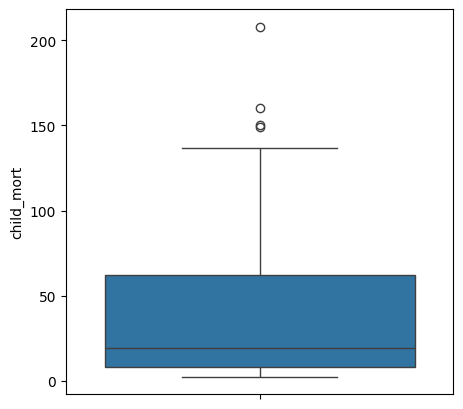

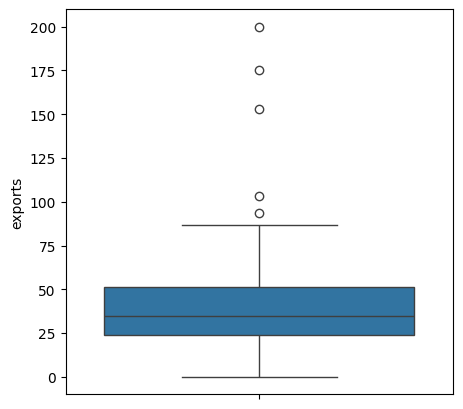

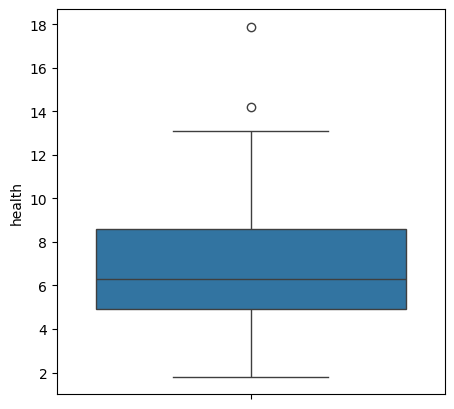

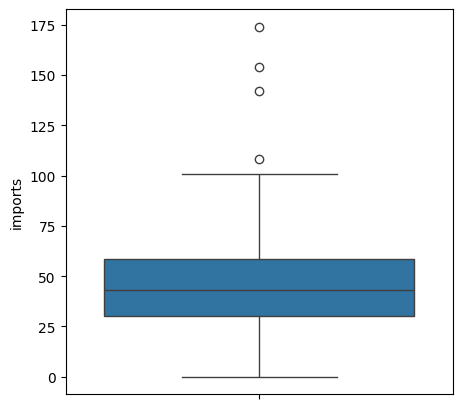

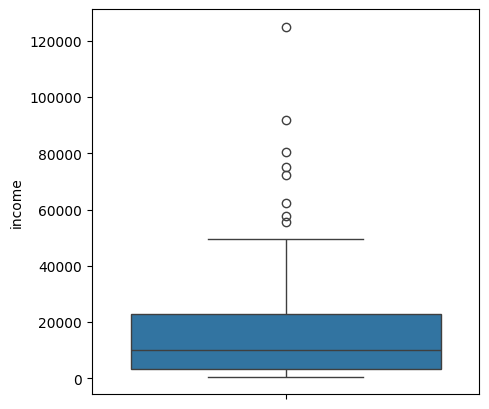

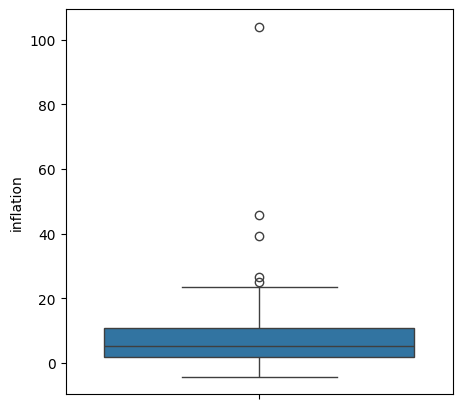

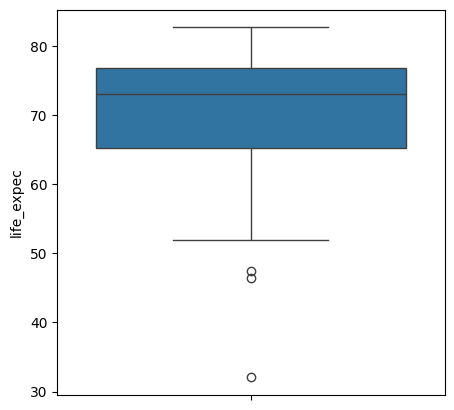

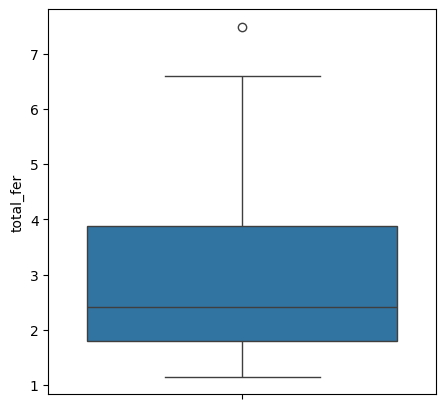

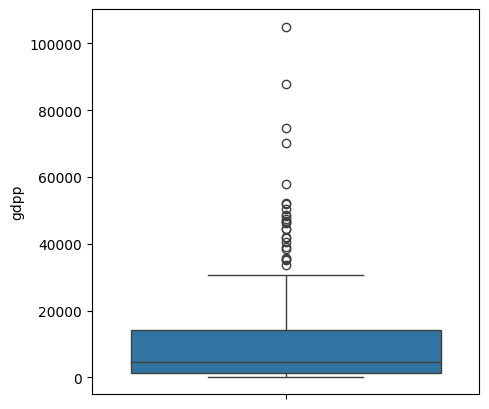

In [73]:
# iteraremos por todas las variables columnas numéricas para graficar cada boxplot
# y así identificar outliers
for _ in int_cols:
  plt.figure(figsize=(5,5))
  sns.boxplot(data=df_country, y=_)
  plt.show()

In [74]:
int_cols

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

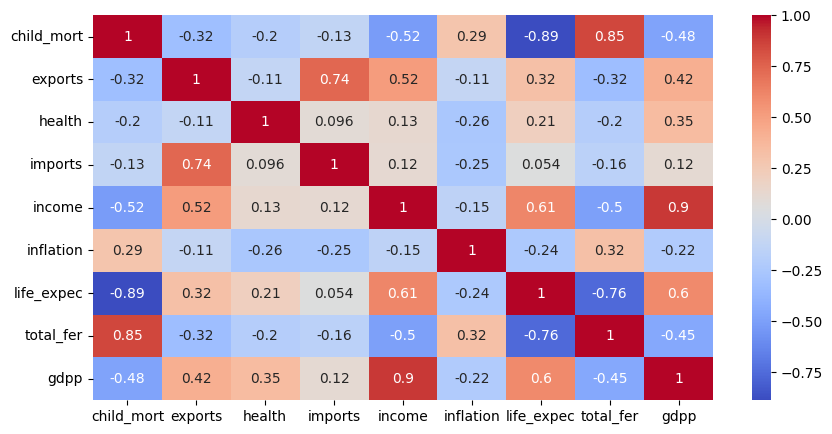

In [75]:
# Graficaremos mediante heatmap correlación entre variables
df_country_var_numeric = df_country.select_dtypes(exclude='object') # guardamos solo variables numéricas
fig = plt.figure(figsize=(10,5))
sns.heatmap(df_country_var_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

### Escalar datos

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # objeto con función de escalamiento
df_country_scaled = scaler.fit_transform(df_country.drop('country', axis=1)) # escalamos datos de las variables excepto 'country'

In [77]:
df_country_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [78]:
# Tomamos df_country_scaled y lo convertimos a dataframe, y le ponemos nombres d ecolumnas
df_country_scaled = pd.DataFrame(df_country_scaled, columns=df_country.drop('country', axis=1).columns)
df_country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [79]:
### Aplicamos PCS (principal components scaled)

In [80]:
from sklearn.decomposition import PCA

In [81]:
pca = PCA() #definimos objeto con función PCA
pca.fit(df_country_scaled)
pca_data_scaled = pca.transform(df_country_scaled)
pca_data_scaled

array([[-2.91302459,  0.09562058, -0.7181185 , ...,  0.38300026,
         0.41507602, -0.01414844],
       [ 0.42991133, -0.58815567, -0.3334855 , ...,  0.24891887,
        -0.22104247,  0.17331578],
       [-0.28522508, -0.45517441,  1.22150481, ..., -0.08721359,
        -0.18416209,  0.08403718],
       ...,
       [ 0.49852439,  1.39074432, -0.23852611, ..., -0.14362677,
        -0.21759009, -0.03652231],
       [-1.88745106, -0.10945301,  1.10975159, ...,  0.06025631,
         0.08949452, -0.09604924],
       [-2.86406392,  0.48599799,  0.22316658, ..., -0.44218462,
         0.66433809, -0.44148176]])

In [82]:
# Vamos a evaluar el índice o ratio de varianza
# para decidir cuanta reducción de dimensionalidad requiero
# es decir de todas las dimensiones del df cuantas necesito
var = pca.explained_variance_ratio_
print(var)

# Arroja un arreglo con 9 ratios de varianza así, con un índice o componente principal,
# con dos índices o componentes principales, así sucesivamente hasta 9 índices o componentes principales

[0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


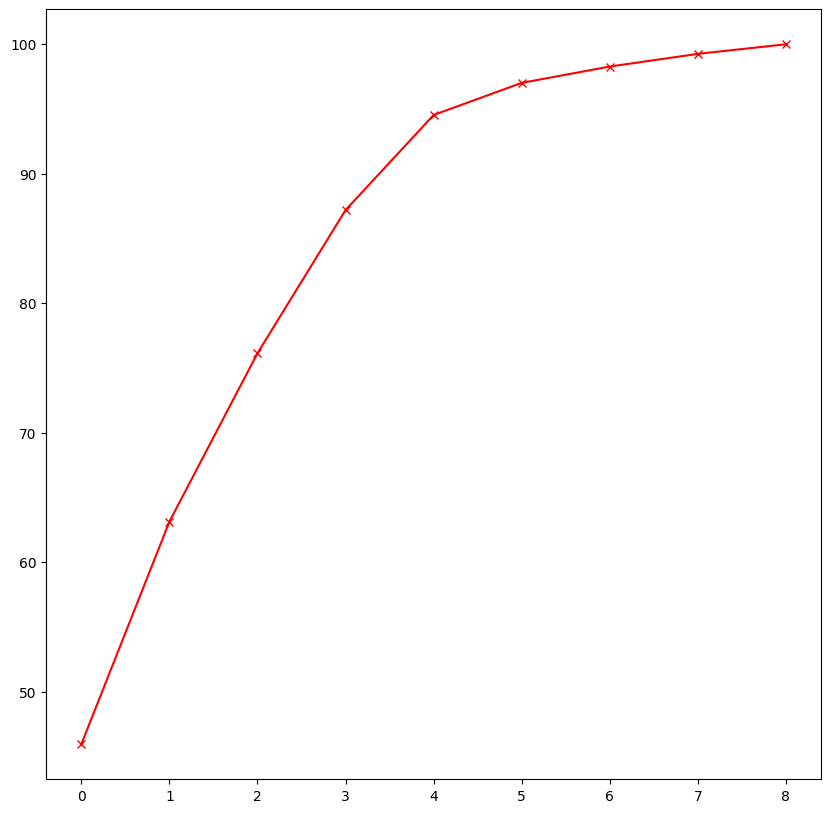

In [83]:
# calculamos la suma de los ratios de la varianza, en porcentaje
cum_var = np.cumsum(np.round(var, decimals=4)*100)
plt.figure(figsize=(10,10))
plt.plot(cum_var, 'r-x')
plt.show()

# En la gráfica las x sobre la línea son las cantidades de componentes princpales de 1 a 9
# y el eje vertical es el porcentaje de ratio de varianza.
# La gráfica arroja que cuando se dejan 4 componentes principales
# se tienen casi el 90% de mis variables,
# con 5 coonmp ppales se tendría aprox. el 95%
# Decidimos 4 componentes principales

In [84]:
# Seleccionando trabajar con 4 componentes principales seguimos
pca_data_standar = pd.DataFrame(pca_data_scaled)  # convertimos a dataframe pca_data_scaled
pca_data_standar.drop([4,5,6,7,8], axis=1, inplace=True) # borramos las columnas dimensiones que no necesito de pca_data_scaled

In [85]:
pca_data_standar

,0,1,2,3
0,-2.913025,0.095621,-0.718118,1.005255
1,0.429911,-0.588156,-0.333486,-1.161059
2,-0.285225,-0.455174,1.221505,-0.868115
3,-2.932423,1.695555,1.525044,0.839625
4,1.033576,0.136659,-0.225721,-0.847063
...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595
163,-0.551036,-1.233886,3.101350,-0.115311
164,0.498524,1.390744,-0.238526,-1.074098
165,-1.887451,-0.109453,1.109752,0.056257


### Importamos librerías para clustering

In [86]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

### K-means

### PCA
Aplicaremos KMeans sobre el dataset al que se le hizo reducción de dimensionalidad pc_data_scaled

In [87]:
# Como no sabemos el K, tenemos que iterar sobre distintos K, para encontrar el apropidado
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
  km = KMeans(n_clusters= _, n_init=10)  # aplicamos KMeans sobre lo que estamos iterando
  y = km.fit_predict(pca_data_standar)  # hacemos predicción
  Sum_of_squared_distances.append(km.inertia_) # el resultados de la predicción y, lo añadimos a sum_of_square para la gráfica del codo
  silhouette_scores.append(silhouette_score(pca_data_standar, y)) # obtenemos los coeficientes de silueta

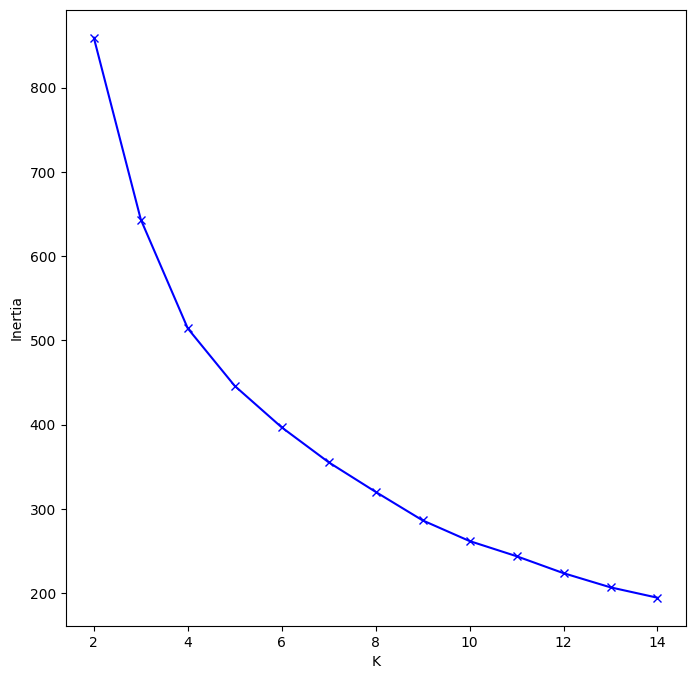

In [88]:
# Graficamos
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

# La gráfica arroja que el K óptimo del codo está entre 4 y 5

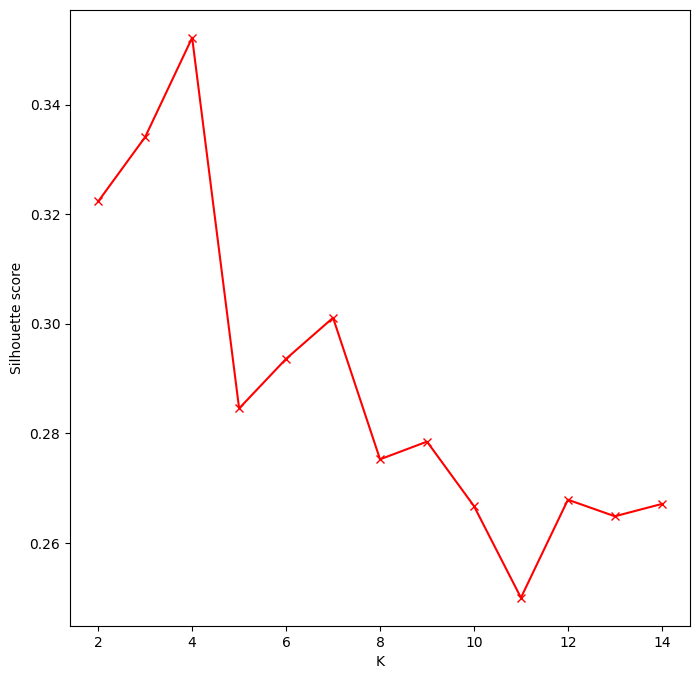

In [89]:
# confirmamos si K óptima está entre 4 y 5 con el coeficiente de silueta
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

# La gráfica arroja que K =  4  es el K óptimo

In [90]:
km = KMeans(n_clusters= 4, n_init=10)  # aplicamos KMeans
y = km.fit_predict(pca_data_standar)  # hacemos predicción
print('Índice de silhouette = ', silhouette_score(pca_data_standar, y)) #imprimimos pca data standar contra predicciones y
df_country['k_means_pca'] = y

Índice de silhouette =  0.34900539172479067


### sin PCA Calcularemos el Índice de silhouette pero

In [91]:
# Como no sabemos el K, tenemos que iterar sobre distintos K, para encontrar el apropidado
Sum_of_squared_distances = []
silhouette_scores = []
K = range(2,15)
for _ in K:
  km = KMeans(n_clusters= _, n_init=10)  # aplicamos KMeans sobre lo que estamos iterando
  y = km.fit_predict(df_country_scaled)  # hacemos predicción
  Sum_of_squared_distances.append(km.inertia_) # el resultados de la predicción y, lo añadimos a sum_of_square para la gráfica del codo
  silhouette_scores.append(silhouette_score(df_country_scaled, y)) # obtenemos los coeficientes de silueta

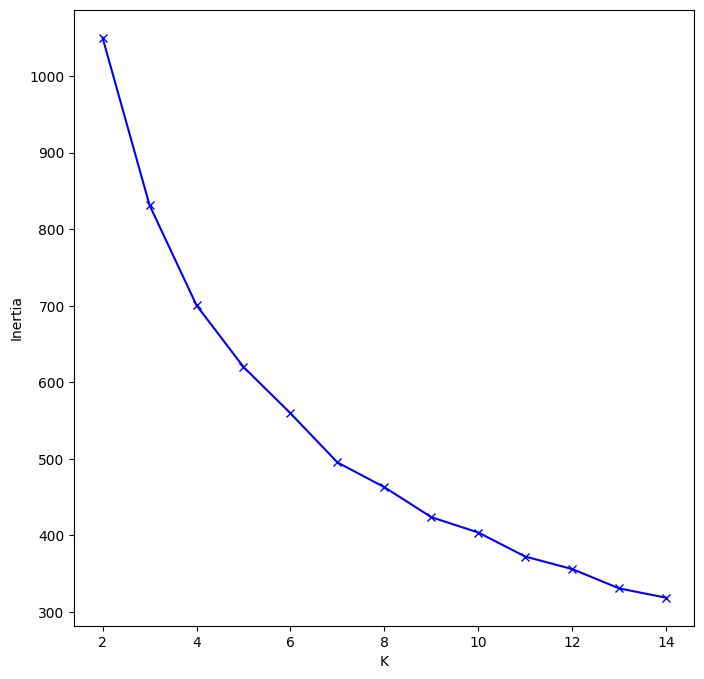

In [92]:
# Graficamos
fig = plt.figure(figsize=(8,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

# La gráfica arroja que el K óptimo del codo está entre 4 y 5

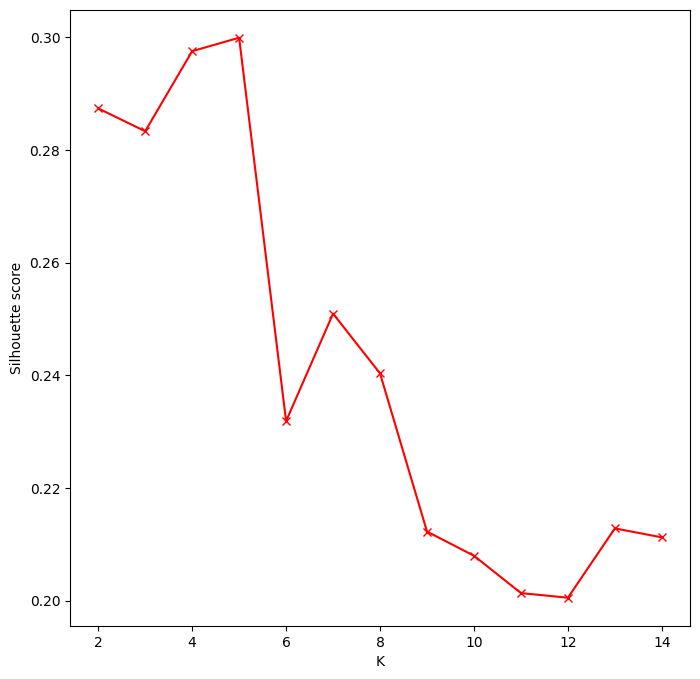

In [93]:
# confirmamos si K óptima está entre 4 y 5 con el coeficiente de silueta
plt.figure(figsize=(8, 8))
plt.plot(K, silhouette_scores, 'rx-')
plt.xlabel('K')
plt.ylabel('Silhouette score')
plt.show()

# La gráfica arroja que K =  5  es el K óptimo

In [94]:
km = KMeans(n_clusters= 5, n_init=10)  # aplicamos KMeans
y = km.fit_predict(df_country_scaled)  # hacemos predicción
print('Índice de silhouette = ', silhouette_score(df_country_scaled, y)) #imprimimos pca data standar contra predicciones y
df_country['k_means'] = y

# El resultado arroja que la reducción de dimensionalidad si está ayudando al algoritmo a obtener mejores resultados.

Índice de silhouette =  0.3065522876043576


### Agglomerative hierarchical clustering
Graficaremos nuestro drendrograma

##### con PCA

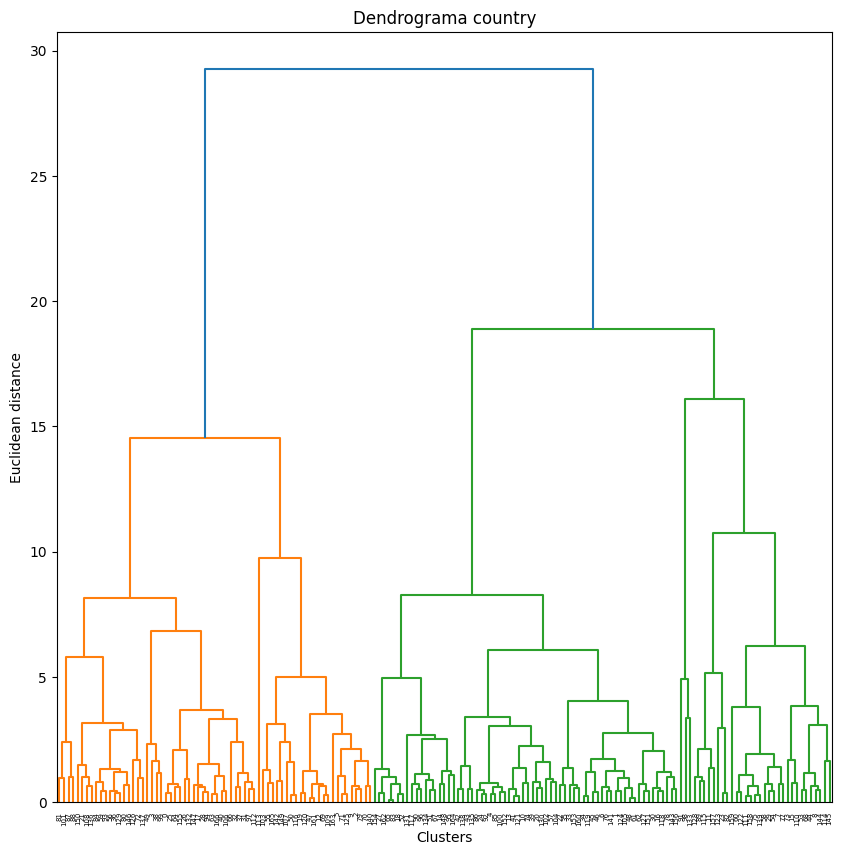

In [95]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_standar, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [96]:
# Trabajaremos sobre la separación de 3 y 2 líneas o clusters del dendrograma para evaluar resultados

# 2 clusters
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standar) #  realizamos predicción
print('El coediciente silhouette es:', silhouette_score(pca_data_standar, y_hc)) # imprimimos coeficiente d esilueta
df_country['hc_pca'] = y_hc #  agregamos a df_coutnry coolumna hc_pca = hierarchical clustering con pca

El coediciente silhouette es: 0.3070110704080526


In [97]:
# Trabajaremos sobre la separación de 3 y 2 líneas o clusters del dendrograma para evaluar resultados

# 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(pca_data_standar) #  realizamos predicción
print('El coediciente silhouette es:', silhouette_score(pca_data_standar, y_hc)) # imprimimos coeficiente d esilueta
df_country['hc_pca'] = y_hc #  agregamos a df_coutnry coolumna hc_pca = hierarchical clustering con pca

El coediciente silhouette es: 0.2700517226575087


##### sin PCA

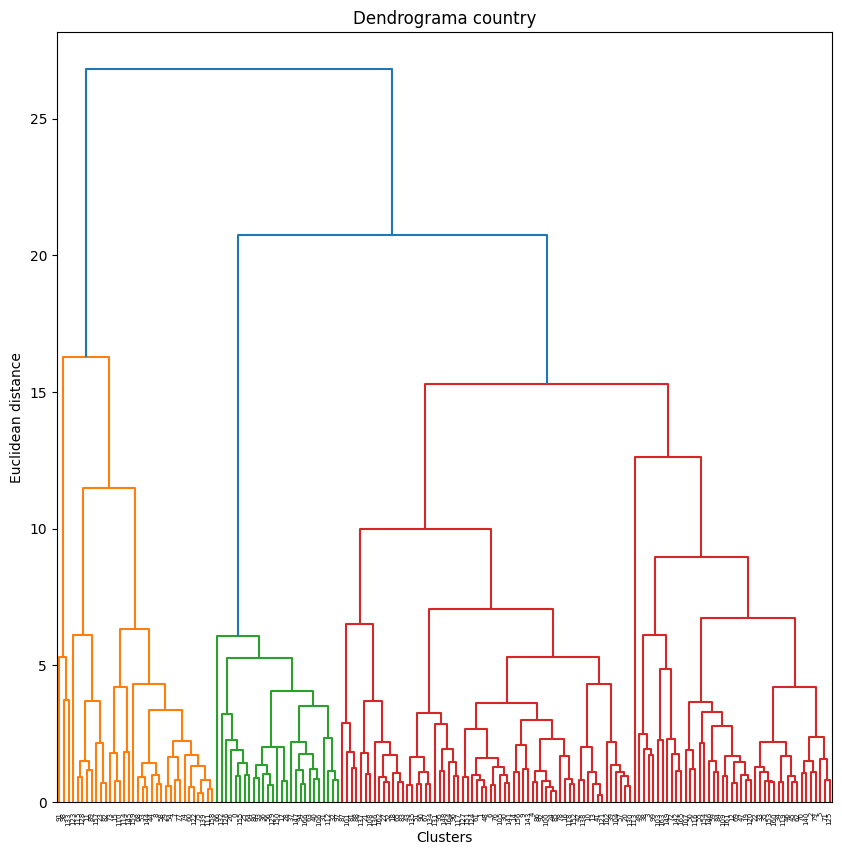

In [98]:
fig = plt.figure(figsize=(10,10))
dendrogram_plot = dendrogram(linkage(pca_data_scaled, method='ward'))
plt.title('Dendrograma country')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')
plt.show()

In [99]:
# Trabajaremos sobre la separación de 3 y 2 líneas o clusters del dendrograma para evaluar resultados

# 3 clusters
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled) #  realizamos predicción
print('El coediciente silhouette es:', silhouette_score(df_country_scaled, y_hc)) # imprimimos coeficiente d esilueta
df_country['hc'] = y_hc #  agregamos a df_coutnry coolumna hc_pca = hierarchical clustering con pca

El coediciente silhouette es: 0.24563001303300652


In [100]:
# Trabajaremos sobre la separación de 3 y 2 líneas o clusters del dendrograma para evaluar resultados

# 2 clusters
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_country_scaled) #  realizamos predicción
print('El coediciente silhouette es:', silhouette_score(df_country_scaled, y_hc)) # imprimimos coeficiente d esilueta
df_country['hc'] = y_hc #  agregamos a df_coutnry coolumna hc_pca = hierarchical clustering con pca

El coediciente silhouette es: 0.3153134331018189


## DBSCAN

##### con PCA

In [101]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=2) #haremos el cálculo con el vecino más cercano
neighbors_fit = neighbors.fit(pca_data_standar)
distances, indices = neighbors_fit.kneighbors(pca_data_standar)

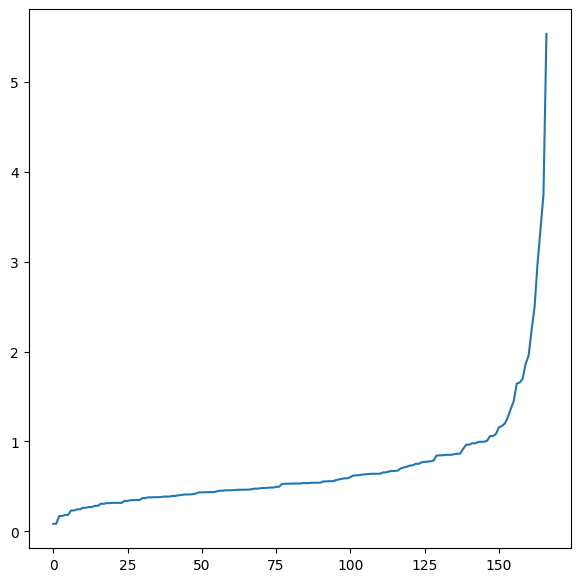

In [102]:
# graficamos
distances = np.sort(distances, axis=0) # ordenamos las distancias por las filas
distances = distances[:,1]  # tomamos solo el valor o columna de la distancia del vecino más cercano
fig = plt.figure(figsize=(7,7))
plt.plot(distances)
plt.show()

# gráfica rodilla arroja que el epsilon está entre 0.5 y 2

In [103]:
eps_values = np.arange(0.5, 2, 0.10) # creamos nuestro rango de valores de eps
min_samples = np.arange(3,12)

In [104]:
from itertools import product

dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
silueta_score = []

for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(pca_data_standar)
  try:
    silueta_score.append(silhouette_score(pca_data_standar, y_dbscan))
  except:
    silueta_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [105]:
# hacemos los pivots para verlo matricialmente y evaluar
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tunning['silueta_score'] = silueta_score
df_param_tunning['n_clusters'] = no_of_clusters

In [106]:
pivot_1 = pd.pivot_table(df_param_tunning, values='silueta_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

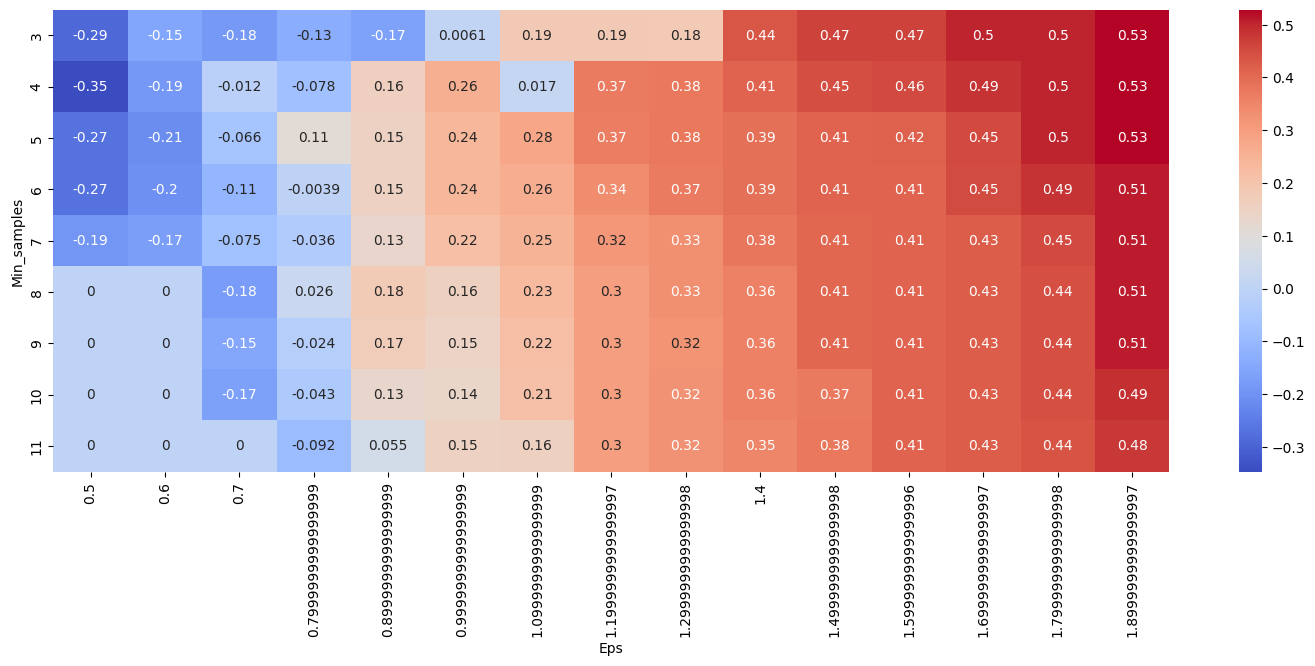

In [107]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

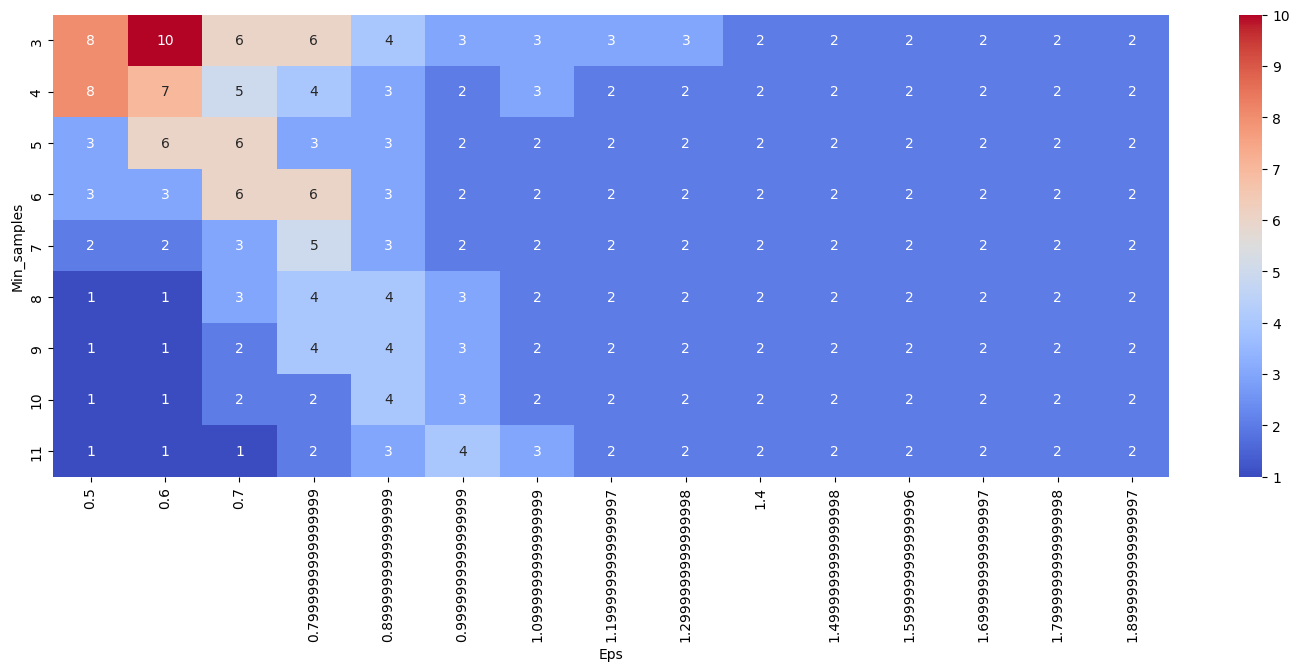

In [108]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [109]:
# Al analizar la gráfica para coef silueta de 0.19 en gráfica, se tiene valor de clusters de 3 en segunda gráfica,
# por lo tanto escogemos valor de Eps de 1.1999 = 1.12
dbscan_train = DBSCAN(eps=1.2, min_samples=3)
y_dbscan = dbscan_train.fit_predict(pca_data_standar)
print(silhouette_score(pca_data_standar, y_dbscan))
df_country['dbscan-pca'] = y_dbscan

# el resultado arroja valor similar al 0.19 de la gráfica 1

0.18591175730784343


## sin PCA

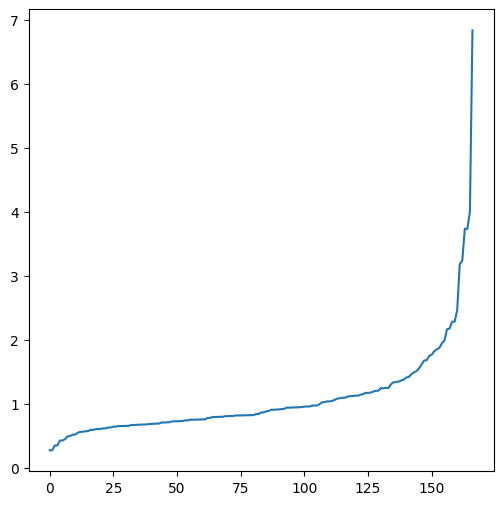

In [110]:
# Vamos a graficar la rodilla
neighbors = NearestNeighbors(n_neighbors=2) # calulamos los vecinos más cercanos
neighbors_fit = neighbors.fit(df_country_scaled)
distances, indices = neighbors_fit.kneighbors(df_country_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig = plt.figure(figsize=(6,6))
plt.plot(distances)

# el resultado arroja que la rodilla está entre eps = y = 1 y 3

In [111]:
eps_values = np.arange(1, 3.0, 0.10)  # creamos rango de valores de eps
min_samples =  np.arange(3, 12)

In [117]:
from itertools import product
dbscan_params = list(product(eps_values, min_samples))
no_of_clusters = []
silueta_score = []
for p in dbscan_params:
  y_dbscan = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(df_country_scaled)
  try:
    silueta_score.append(silhouette_score(df_country_scaled, y_dbscan))
  except:
    silueta_score.append(0)
  no_of_clusters.append(len(np.unique(y_dbscan)))

In [118]:
# hacemos los pivots para verlo matricialmente y evaluar
df_param_tunning = pd.DataFrame.from_records(dbscan_params, columns=['Eps', 'Min_samples'])
df_param_tunning['silueta_score'] = silueta_score
df_param_tunning['n_clusters'] = no_of_clusters

In [119]:
pivot_1 = pd.pivot_table(df_param_tunning, values='silueta_score', columns='Eps', index='Min_samples')
pivot_2 = pd.pivot_table(df_param_tunning, values='n_clusters', columns='Eps', index='Min_samples')

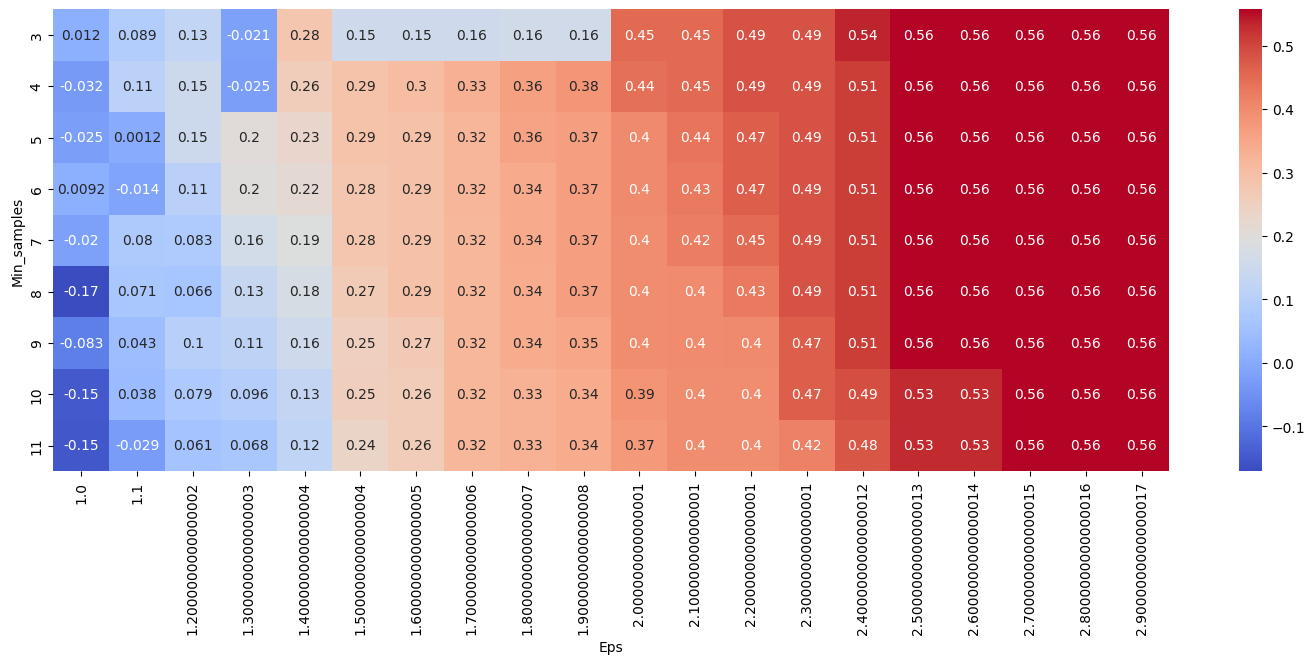

In [120]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

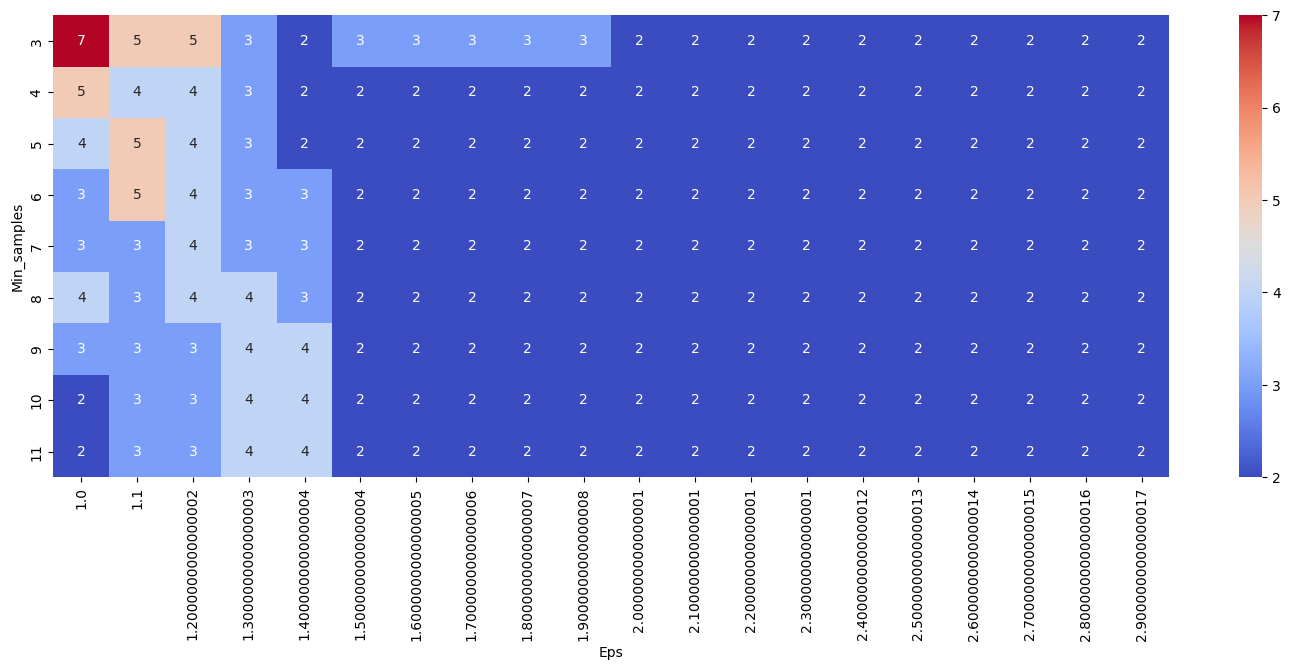

In [121]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_2, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax=ax)
plt.show()

In [122]:
# Al analizar la gráfica para coef silueta de 0.19 en gráfica, se tiene valor de clusters de 3 en segunda gráfica,
# por lo tanto escogemos valor de Eps de 1.1999 = 1.12
dbscan_train = DBSCAN(eps=1.7, min_samples=3)
y_dbscan = dbscan_train.fit_predict(df_country_scaled)
print(silhouette_score(df_country_scaled, y_dbscan))
df_country['dbscan_cluster'] = y_dbscan

# el resultado arroja valor similar al 0.19 de la gráfica 1

0.1563549566374231


In [123]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan-pca,dbscan_cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1,1,1,0,0,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,1,0,0,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1,1,1,0,-1,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,0,2,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,0,1,0,-1,-1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,3,0,2,0,0,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1,1,1,0,0,0


## Evaluación de resultados

Evaluaremos los resultados que obtuvimos con k_means pca, que arrojó mrejores resultados

In [124]:
df_country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca',
       'k_means', 'hc_pca', 'hc', 'dbscan-pca', 'dbscan_cluster'],
      dtype='object')

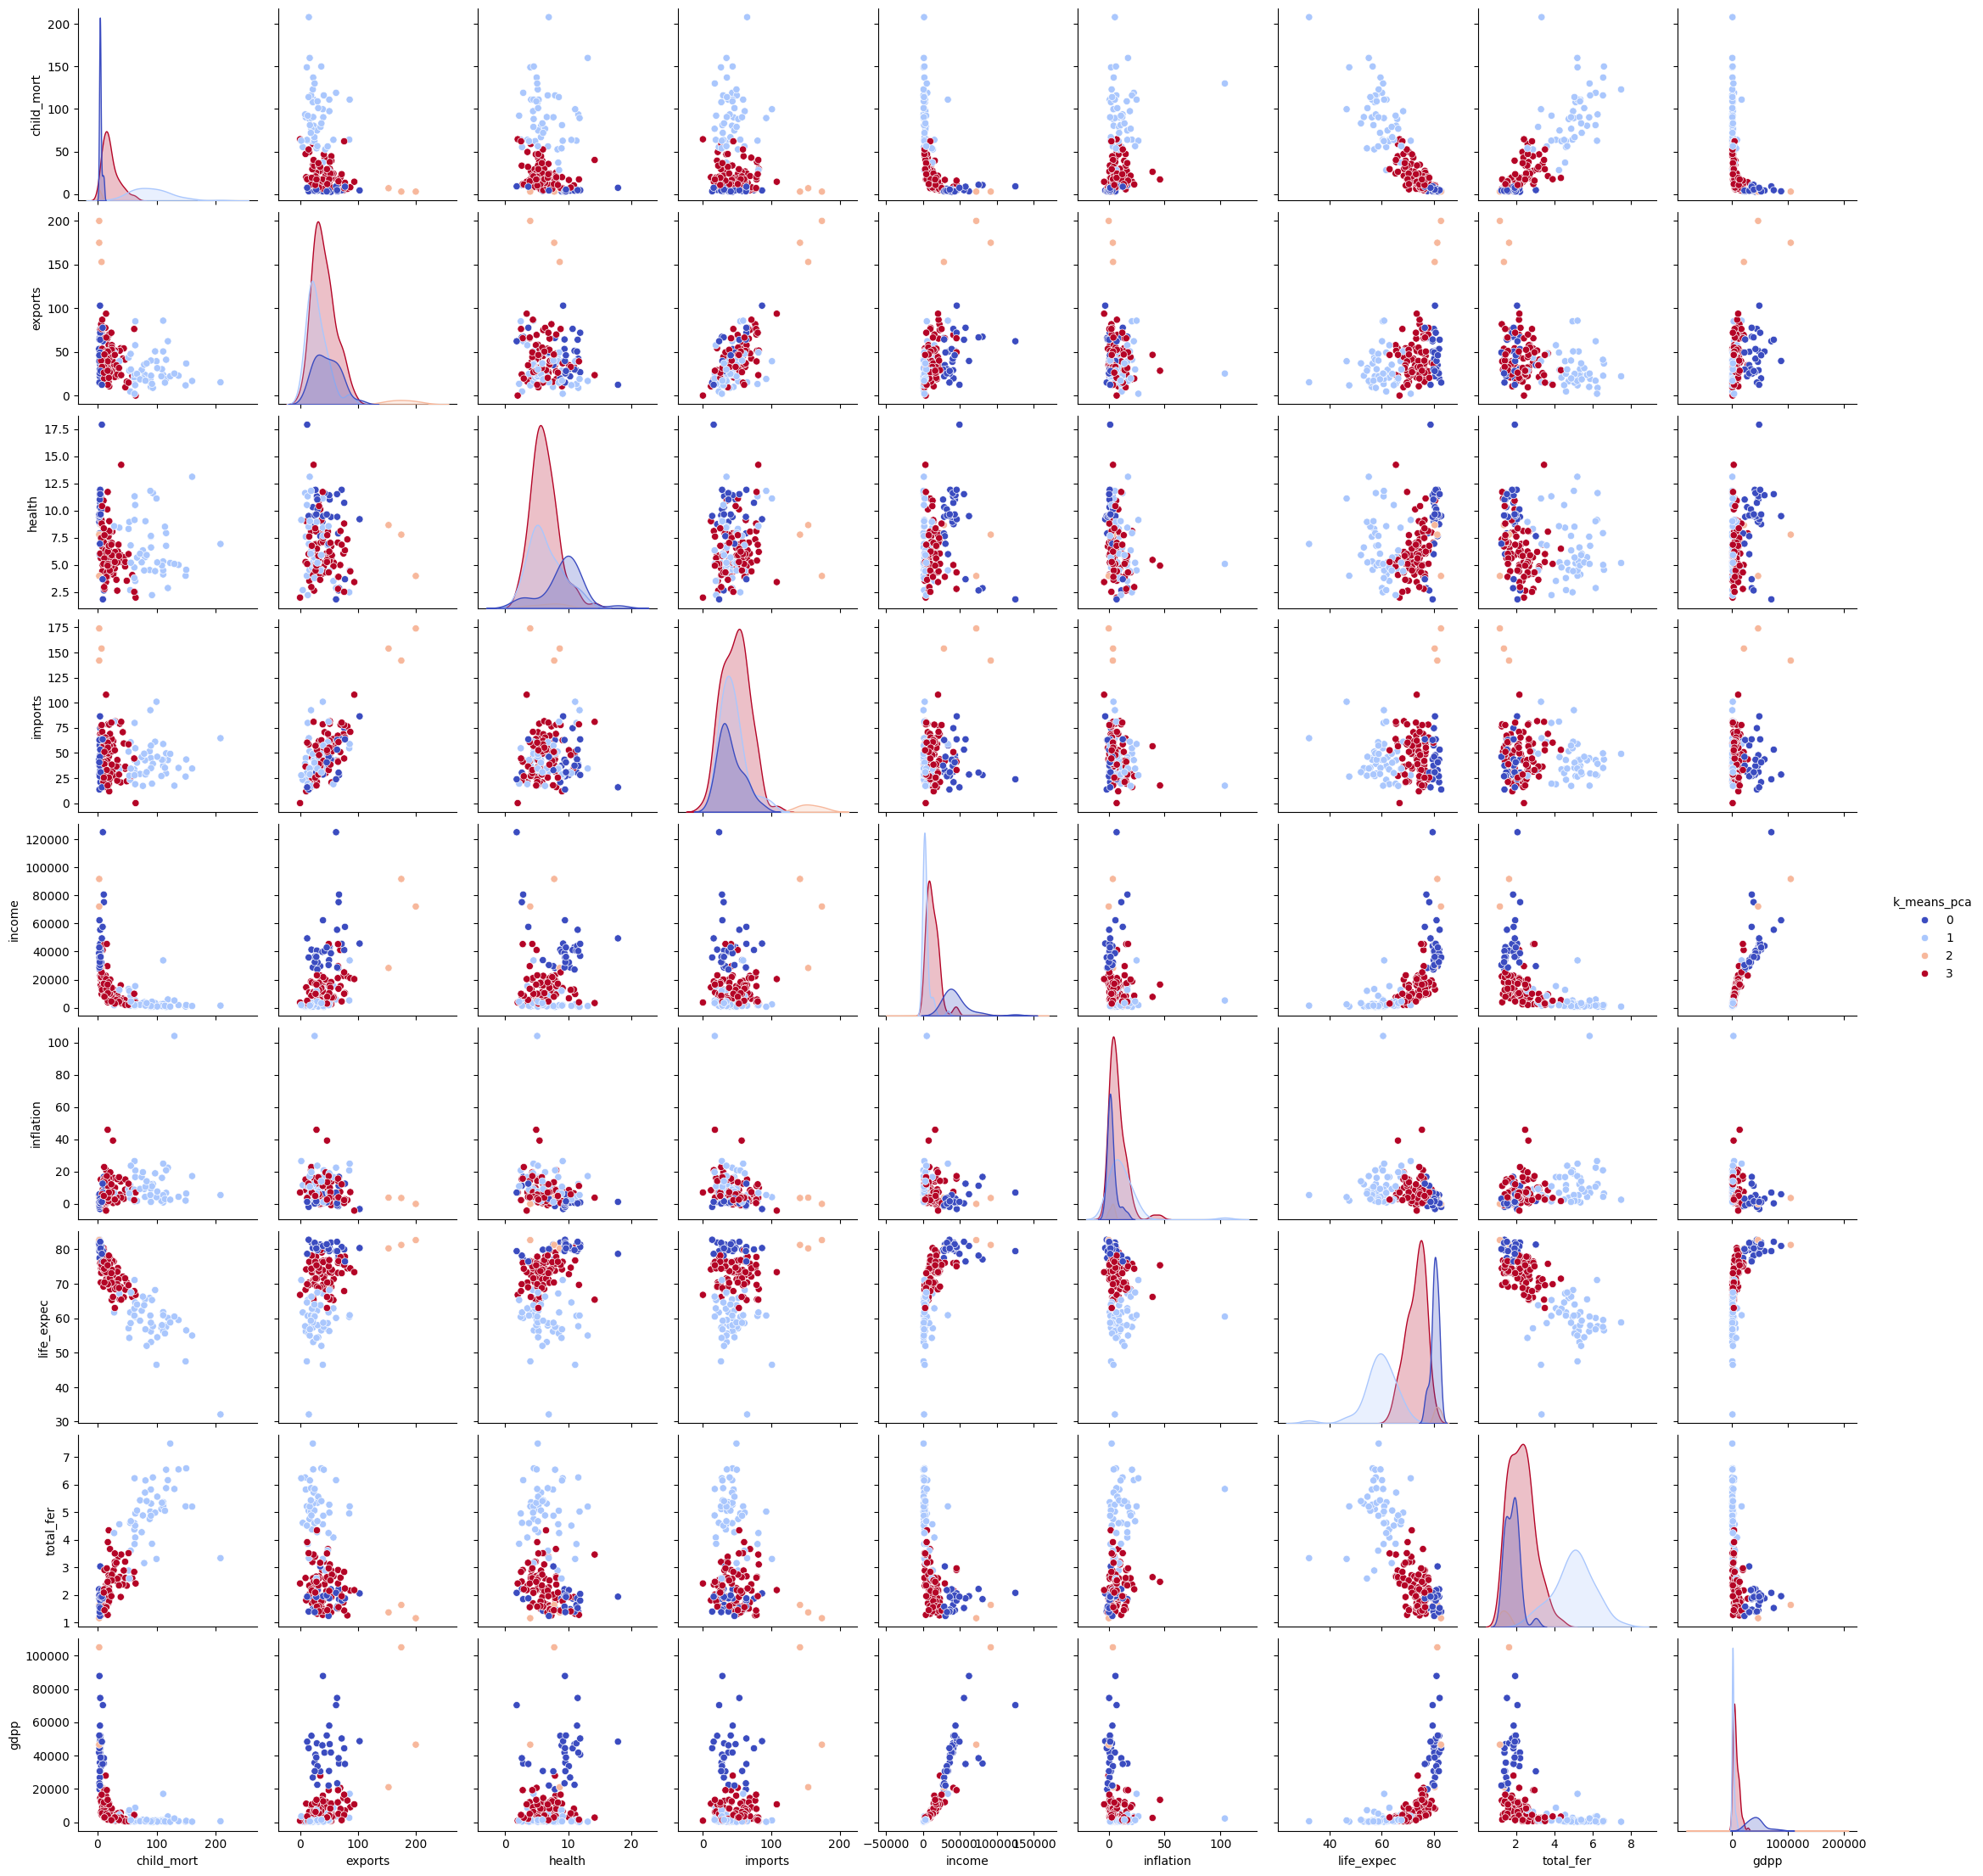

In [126]:
# solo vamos a graficar las columnas 'child_mort', 'exports', 'health', 'imports', 'income',
#'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca'

sns.pairplot(data=df_country[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'k_means_pca']], hue='k_means_pca', palette='coolwarm')

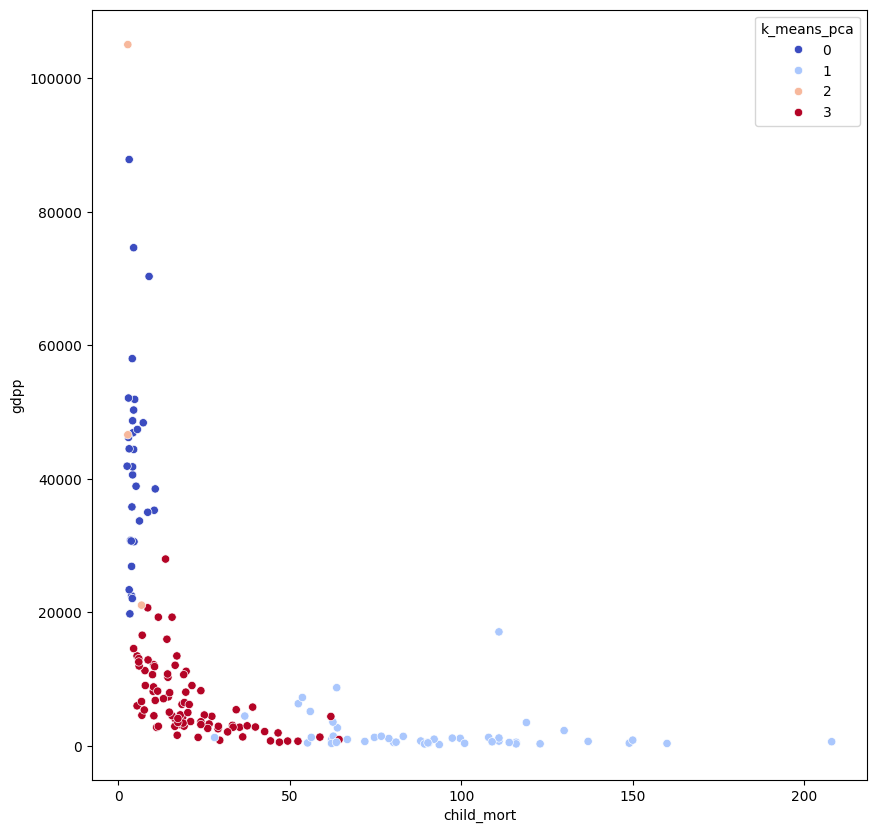

In [127]:
# Vamos a analizar la relación entre el child_mort y gdpp
fig = plt.figure(figsize=(10,10))
sns.scatterplot (data=df_country, x='child_mort', y='gdpp', hue='k_means_pca', palette='coolwarm')
plt.show()

In [132]:
# Analizamos el df de cada cluster, cambiando el valor == 0, 1, 2, 3
df_country[df_country['k_means_pca']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan-pca,dbscan_cluster
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0,4,0,1,0,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0,4,0,1,0,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0,4,0,1,0,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0,4,0,1,-1,-1
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0,4,0,1,0,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0,4,2,0,0,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0,0,2,0,0,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0,4,0,1,0,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,0,4,0,1,0,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,0,4,0,1,0,0


In [133]:
# Analizamos el df de cada cluster, cambiando el valor == 0, 1, 2, 3
df_country[df_country['k_means_pca']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan-pca,dbscan_cluster
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1,1,1,0,0,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1,1,1,0,-1,0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1,1,1,0,0,0
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1,1,1,0,0,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1,1,1,0,0,0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1,1,1,0,0,0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1,1,1,0,0,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1,1,1,0,0,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1,1,1,0,0,0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1,1,1,0,0,0


In [134]:
# Analizamos el df de cada cluster, cambiando el valor == 0, 1, 2, 3
df_country[df_country['k_means_pca']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan-pca,dbscan_cluster
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2,3,0,1,-1,-1
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2,3,0,1,-1,-1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2,3,0,1,-1,-1


In [135]:
# Analizamos el df de cada cluster, cambiando el valor == 0, 1, 2, 3
df_country[df_country['k_means_pca']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,k_means_pca,k_means,hc_pca,hc,dbscan-pca,dbscan_cluster
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3,0,2,0,0,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,3,0,1,0,0,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3,0,2,0,0,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,3,0,1,0,0,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,3,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,Uruguay,10.6,26.3,8.35,25.4,17100,4.91,76.4,2.08,11900,3,0,2,0,0,0
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,3,0,1,0,0,0
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3,0,2,0,0,0
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,3,0,1,0,-1,-1
